In [82]:
from pyspark.sql import SparkSession

In [83]:
spark = SparkSession.builder.appName('dataframe').getOrCreate()

In [84]:
spark

### REading dataset

In [85]:
spark.read.option('header', 'true').csv('test1.csv').show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [86]:
df_pyspark = spark.read.option('header', 'true').csv('test1.csv')

### checking the schema
equivalent to df.info in pandas

In [87]:
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: string (nullable = true)
 |-- Experience: string (nullable = true)
 |-- Salary: string (nullable = true)



to automatically get proper data types from dataset

In [88]:
df_pyspark = spark.read.option('header', 'true').csv('test1.csv', inferSchema=True)

In [89]:
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



can do both header and infer schema in single line if needed

In [90]:
df_pyspark = spark.read.csv('test1.csv', header=True, inferSchema=True )

In [91]:
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



to check the type of the dataframe.

In [92]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

to get the list of columns

In [93]:
df_pyspark.columns

['Name', 'age', 'Experience', 'Salary']

equivalent to head in pandas but we get it here as list instead of df like in pandas

In [94]:
df_pyspark.head(4)

[Row(Name='Krish', age=31, Experience=10, Salary=30000),
 Row(Name='Sudhanshu', age=30, Experience=8, Salary=25000),
 Row(Name='Sunny', age=29, Experience=4, Salary=20000),
 Row(Name='Paul', age=24, Experience=3, Salary=20000)]

to select a single colums. the return type is dataframe

In [95]:
df_pyspark.select('Name')

DataFrame[Name: string]

In [96]:
type(df_pyspark.select('Name'))

pyspark.sql.dataframe.DataFrame

.show shows the column

In [97]:
df_pyspark.select('Name').show()

+---------+
|     Name|
+---------+
|    Krish|
|Sudhanshu|
|    Sunny|
|     Paul|
|   Harsha|
|  Shubham|
+---------+



to pickup multiple columns, we have to give the list of columns

In [98]:
df_pyspark.select(['Name', 'Experience']) #.show()

DataFrame[Name: string, Experience: int]

to check the datatypes of the columns

In [99]:
df_pyspark.dtypes

[('Name', 'string'), ('age', 'int'), ('Experience', 'int'), ('Salary', 'int')]

similar to describe in pandas

In [100]:
df_pyspark.describe()

DataFrame[summary: string, Name: string, age: string, Experience: string, Salary: string]

In [101]:
df_pyspark.describe().show()

+-------+------+------------------+-----------------+------------------+
|summary|  Name|               age|       Experience|            Salary|
+-------+------+------------------+-----------------+------------------+
|  count|     6|                 6|                6|                 6|
|   mean|  NULL|26.333333333333332|4.666666666666667|21333.333333333332|
| stddev|  NULL| 4.179314138308661|3.559026084010437| 5354.126134736337|
|    min|Harsha|                21|                1|             15000|
|    max| Sunny|                31|               10|             30000|
+-------+------+------------------+-----------------+------------------+



## Adding column to df

In [102]:
df_pyspark = df_pyspark.withColumn('Exp +2', df_pyspark['Experience']+2)

In [103]:
df_pyspark.show()

+---------+---+----------+------+------+
|     Name|age|Experience|Salary|Exp +2|
+---------+---+----------+------+------+
|    Krish| 31|        10| 30000|    12|
|Sudhanshu| 30|         8| 25000|    10|
|    Sunny| 29|         4| 20000|     6|
|     Paul| 24|         3| 20000|     5|
|   Harsha| 21|         1| 15000|     3|
|  Shubham| 23|         2| 18000|     4|
+---------+---+----------+------+------+



## Drop columns
with `.drop()` method

In [104]:
df_pyspark = df_pyspark.drop('Exp +2')

In [105]:
df_pyspark.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



## Rename columns
`.withColumnRenamed()`

In [106]:
df_pyspark.withColumnRenamed('Name', 'New Name').show() #not assigning this back and making changes here.

+---------+---+----------+------+
| New Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



# Pyspark handling missing values

Dropping columns

In [107]:
df_pyspark = spark.read.csv('test2.csv', header= True, inferSchema= True)

In [108]:
df_pyspark.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
|     NULL|NULL|      NULL|  NULL|
+---------+----+----------+------+



#### dropping names based on the NULL values

`.na.drop()` drops the rows having null values

In [109]:
df_pyspark.na.drop().show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



#### How

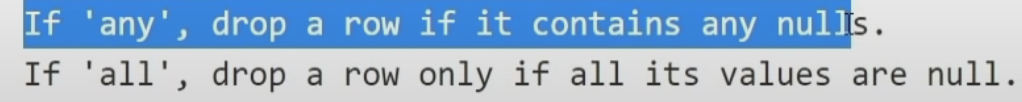

In [110]:
df_pyspark.na.drop(how='any').show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [111]:
df_pyspark.na.drop(how='all').show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



### Threshold

number of NULL values an row should have to get deleted

In [116]:
df_pyspark.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
|     NULL|NULL|      NULL|  NULL|
+---------+----+----------+------+



<s>deletes row if it has more NULL than given threshold</s>    

Row should have 
- at least n number of non-NULL values given in the threshold.

In [117]:
df_pyspark.na.drop(how="any", thresh=1).show() # at least 1 non-NULL values, others will be dropped

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



In [112]:
df_pyspark.na.drop(how="any", thresh=2).show() # at least 2 non-NULL values, others will be dropped

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
+---------+----+----------+------+



In [118]:
df_pyspark.na.drop(how="any", thresh=3).show() # at least 3 non-NULL values, others will be dropped

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     NULL| 34|        10| 38000|
+---------+---+----------+------+



### Subset

drop NaN or NULL values from selected columns

In [119]:
df_pyspark.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
|     NULL|NULL|      NULL|  NULL|
+---------+----+----------+------+



In [120]:
df_pyspark.na.drop(subset= ['age']).show() # drops rows containing NULL in age column

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     NULL| 34|        10| 38000|
|     NULL| 36|      NULL|  NULL|
+---------+---+----------+------+



In [121]:
df_pyspark.na.drop(subset= ['Experience']).show() # drops rows containing NULL in Experience column

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     NULL| 34|        10| 38000|
+---------+---+----------+------+



can also select multiple columns

In [123]:
df_pyspark.na.drop(subset= ['name', 'salary']).show() #can also select multiple columns

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
+---------+----+----------+------+



### Filling the missing values

In [126]:
df_pyspark.na.fill('***').show() 

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|      ***|  34|        10| 38000|
|      ***|  36|      NULL|  NULL|
|      ***|NULL|      NULL|  NULL|
+---------+----+----------+------+



^^ since we have type for columns and we gave a `string` it only replaces string like above

or only columns with numbers like below

In [128]:
df_pyspark.na.fill(69).show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|   Mahesh| 69|        69| 40000|
|     NULL| 34|        10| 38000|
|     NULL| 36|        69|    69|
|     NULL| 69|        69|    69|
+---------+---+----------+------+



we can specify columsn where we need to replace. 

In [131]:
df_pyspark.na.fill(69, 'salary').show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|    69|
|     NULL|NULL|      NULL|    69|
+---------+----+----------+------+



can use more than one column

In [132]:
df_pyspark.na.fill(69, ['age', 'experience']).show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|   Mahesh| 69|        69| 40000|
|     NULL| 34|        10| 38000|
|     NULL| 36|        69|  NULL|
|     NULL| 69|        69|  NULL|
+---------+---+----------+------+



In [142]:
df_pyspark.na.fill('***', ['name', 'age', 'experience']).show()
 # can only do one datatype at once if colum types are defined

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|      ***|  34|        10| 38000|
|      ***|  36|      NULL|  NULL|
|      ***|NULL|      NULL|  NULL|
+---------+----+----------+------+



## Imputer()

replacing NULL values in specific columns with mean or median

we use `Imputer()` function

In [145]:
from pyspark.ml.feature import Imputer

imputer_median = Imputer(
    inputCols=['age', 'Experience', 'Salary'], # Columns to modify
    outputCols=["{}_imputed".format(c) for c in ['age', 'Experience', 'Salary']] # creates new columns with _imputed suffix
                # list comprehension to generate names based on given names ^
    ).setStrategy("median")

In [158]:
imputer_mean = Imputer(
    inputCols=['age', 'Experience', 'Salary'], # Columns to modify
    outputCols=["{}_imputed".format(c) for c in ['age', 'Experience', 'Salary']] # creates new columns with _imputed suffix
                # list comprehension to generate names based on given names ^
    ).setStrategy("mean")

### imputating df's

`fit` method essentially calculates the median for the specified columns from the input DataFrame.   
It computes the median separately for each column.

After fitting the imputer, `transform` transforms the original DataFrame df_pyspark by replacing missing values in the specified columns with the calculated median values.   
The result is a new DataFrame with the imputed values.

`transform` method is used to replace missing (null) values in a DataFrame with the imputed values calculated during the `fit` step

In [151]:
imputer_median.fit(df_pyspark).transform(df_pyspark).show()


+---------+----+----------+------+-----------+------------------+--------------+
|     Name| age|Experience|Salary|age_imputed|Experience_imputed|Salary_imputed|
+---------+----+----------+------+-----------+------------------+--------------+
|    Krish|  31|        10| 30000|         31|                10|         30000|
|Sudhanshu|  30|         8| 25000|         30|                 8|         25000|
|    Sunny|  29|         4| 20000|         29|                 4|         20000|
|     Paul|  24|         3| 20000|         24|                 3|         20000|
|   Harsha|  21|         1| 15000|         21|                 1|         15000|
|  Shubham|  23|         2| 18000|         23|                 2|         18000|
|   Mahesh|NULL|      NULL| 40000|         29|                 4|         40000|
|     NULL|  34|        10| 38000|         34|                10|         38000|
|     NULL|  36|      NULL|  NULL|         36|                 4|         20000|
|     NULL|NULL|      NULL| 

In [161]:
imputer_mean.fit(df_pyspark).transform(df_pyspark).show()

+---------+----+----------+------+-----------+------------------+--------------+
|     Name| age|Experience|Salary|age_imputed|Experience_imputed|Salary_imputed|
+---------+----+----------+------+-----------+------------------+--------------+
|    Krish|  31|        10| 30000|         31|                10|         30000|
|Sudhanshu|  30|         8| 25000|         30|                 8|         25000|
|    Sunny|  29|         4| 20000|         29|                 4|         20000|
|     Paul|  24|         3| 20000|         24|                 3|         20000|
|   Harsha|  21|         1| 15000|         21|                 1|         15000|
|  Shubham|  23|         2| 18000|         23|                 2|         18000|
|   Mahesh|NULL|      NULL| 40000|         28|                 5|         40000|
|     NULL|  34|        10| 38000|         34|                10|         38000|
|     NULL|  36|      NULL|  NULL|         36|                 5|         25750|
|     NULL|NULL|      NULL| 

## Filter Operations

In [162]:
df_pyspark.filter('salary<=20000').show()

+-------+---+----------+------+
|   Name|age|Experience|Salary|
+-------+---+----------+------+
|  Sunny| 29|         4| 20000|
|   Paul| 24|         3| 20000|
| Harsha| 21|         1| 15000|
|Shubham| 23|         2| 18000|
+-------+---+----------+------+



to select specific columns

In [163]:
df_pyspark.filter('salary<=20000').select(['name', 'age']).show()

+-------+---+
|   name|age|
+-------+---+
|  Sunny| 29|
|   Paul| 24|
| Harsha| 21|
|Shubham| 23|
+-------+---+



another way

In [164]:
df_pyspark.filter(df_pyspark['salary']<=20000).show()

+-------+---+----------+------+
|   Name|age|Experience|Salary|
+-------+---+----------+------+
|  Sunny| 29|         4| 20000|
|   Paul| 24|         3| 20000|
| Harsha| 21|         1| 15000|
|Shubham| 23|         2| 18000|
+-------+---+----------+------+



more than one condition

In [168]:
df_pyspark.filter((df_pyspark['salary'] <= 20000) & (df_pyspark['salary'] >= 15000)).show()
# have to specify each condition in parantheses

+-------+---+----------+------+
|   Name|age|Experience|Salary|
+-------+---+----------+------+
|  Sunny| 29|         4| 20000|
|   Paul| 24|         3| 20000|
| Harsha| 21|         1| 15000|
|Shubham| 23|         2| 18000|
+-------+---+----------+------+



Inverse or NOT condition `~`

In [169]:
df_pyspark.filter(~(df_pyspark['salary']<=20000)).show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
+---------+----+----------+------+

